# Project Speed Dating - AM
### prenant les premiers etapes du 'gestion de valeurs manquantes' qui me parrait tres logique

In [1]:
# installing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import Imputer

In [2]:
#importing dataset
dating = pd.read_csv('Speed Dating Data.csv', encoding = 'ISO-8859-1')
dating.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# looking at nan counts
pd.DataFrame(dating.isnull().sum(), columns = ['nan_count'])

,nan_count
iid,0
id,1
gender,0
idg,0
condtn,0
...,...
attr5_3,6362
sinc5_3,6362
intel5_3,6362
fun5_3,6362


In [4]:
# dropping uneccesary varibles
# narrowing dataset
dating_1 = dating.iloc[:, 11:28]
dating_2 = dating.iloc[:, 30:35]
dating_3 = dating.iloc[:, 39:43]
dating_4 = dating.iloc[:, 45:67]
dating_5 = dating.iloc[:, 69:74]
dating_6 = dating.iloc[:, 87:91]
dating_7 = dating.iloc[:, 97:102]
dating_8 = dating.iloc[:, 104:107]

date = pd.concat([dating.iloc[:, 0],dating.iloc[:, 2],dating_1,dating_2,dating_3,dating_4,dating_5,
                  dating_6,dating_7,dating_8], axis=1)

In [5]:
# for now to look at variables we won't replace null values, just drop them
date2 = date.dropna()

In [6]:
# to seperate numeric and string type variables
stringy_cols = []
num_cols = []
for i in date2.columns:
    if pd.to_numeric(date2[i], errors='coerce').notnull().all() == True:
        num_cols.append(i)
    else:
        stringy_cols.append(i)

In [7]:
print(stringy_cols)

['field', 'from', 'career']


In [8]:
# note that _o means partner and without means self
print(num_cols)

['iid', 'gender', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o', 'prob_o', 'met_o', 'age', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met']


In [9]:
# creating a numerical dataset
date3 = date2.drop(stringy_cols, axis = 1)

In [10]:
print('num and string variables: ',date2.shape)
print('num variables: ',date3.shape)

num and string variables:  (6797, 67)
num variables:  (6797, 64)


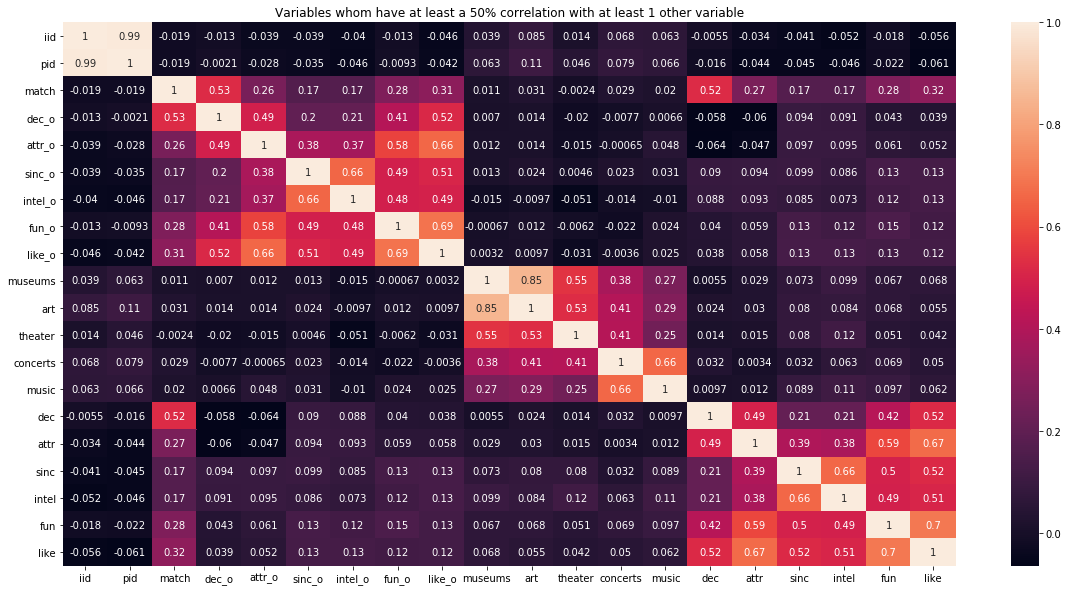

In [80]:
# creating a heatmap to see links between variables, only keeping those that have >50% correlation with another variable
corr = date3.corr()
filt_1s = [max(abs(x[x != 1])) for x in corr.values]  # removing our 1 correlation between the variable and itself 
                                                        # whilst keeping only the highest corr of the variable
date_high = date3.iloc[:,[x > 0.5 for x in filt_1s]]  # removing all data that doesnt have maxcorr > 0.5
dateh_corr = date_high.corr()
plt.subplots(figsize = (20,10))
sns.heatmap(dateh_corr, 
            xticklabels = dateh_corr.columns.values, 
            yticklabels = dateh_corr.columns.values, 
            annot = True)
# unfortunately the heatmap method cuts the bottom and top of the figure, the following solution was found
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.title('Variables whom have at least a 50% correlation with at least 1 other variable')
plt.show()

In [12]:
# to check which variables are closest tied to our 'match' result
corr.match[abs(corr.match)>0.1]
# now we know which variables to refine our dataset to, and prepare for null value filling

match      1.000000
dec_o      0.525080
attr_o     0.263869
sinc_o     0.167217
intel_o    0.169106
fun_o      0.278102
like_o     0.312442
prob_o     0.260750
met_o     -0.114970
dec        0.524295
attr       0.265760
sinc       0.172255
intel      0.171725
fun        0.280478
like       0.315384
prob       0.265932
Name: match, dtype: float64

In [13]:
# our refined dataset
index = corr.match[abs(corr.match)>0.1].index
date_corr = date[index]
date_corr.isnull().sum()

match        0
dec_o        0
attr_o     212
sinc_o     287
intel_o    306
fun_o      360
like_o     250
prob_o     318
met_o      385
dec          0
attr       202
sinc       277
intel      296
fun        350
like       240
prob       309
dtype: int64

In [82]:
date_corr.describe()

,match,dec_o,attr_o,sinc_o,intel_o,fun_o,like_o,prob_o,met_o,dec,attr,sinc,intel,fun,like,prob
count,8378.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,8128.000000,8060.000000,7993.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,8138.000000,8069.000000
mean,0.164717,0.419551,6.190411,7.175256,7.369301,6.400599,6.134498,5.208251,1.960215,0.419909,6.189995,7.175164,7.368597,6.400598,6.134087,5.207523
std,0.370947,0.493515,1.950305,1.740575,1.550501,1.954078,1.841258,2.129354,0.245925,0.493573,1.950169,1.740315,1.550453,1.953702,1.841285,2.129565
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,5.000000,6.000000,6.000000,5.000000,5.000000,4.000000,2.000000,0.000000,5.000000,6.000000,6.000000,5.000000,5.000000,4.000000
50%,0.000000,0.000000,6.000000,7.000000,7.000000,7.000000,6.000000,5.000000,2.000000,0.000000,6.000000,7.000000,7.000000,7.000000,6.000000,5.000000
75%,0.000000,1.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,2.000000,1.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000
max,1.000000,1.000000,10.500000,10.000000,10.000000,11.000000,10.000000,10.000000,8.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


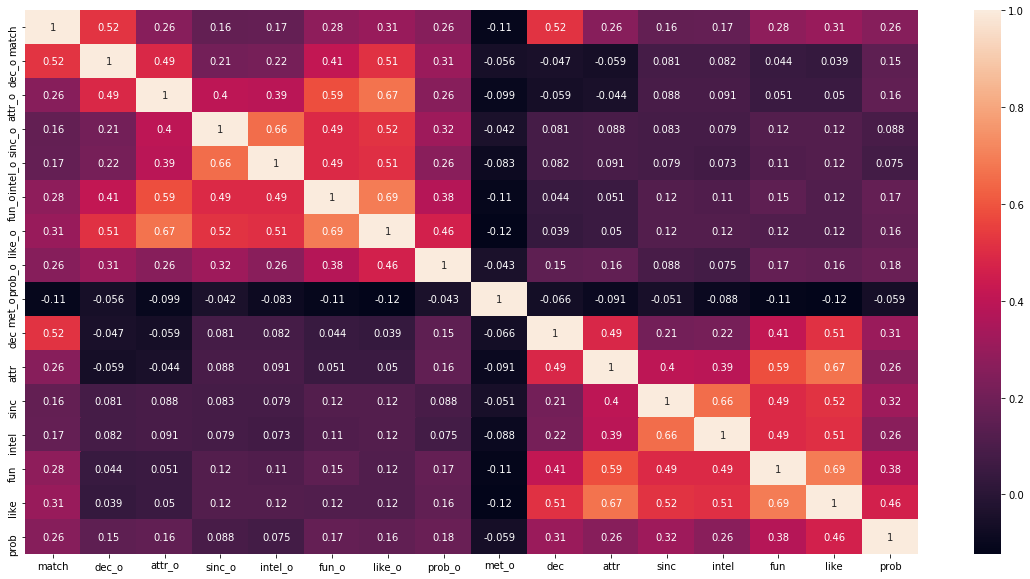

In [15]:
# visualising the chosen variables
final_corr = date_corr.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(final_corr,
           xticklabels = final_corr.columns.values,
           yticklabels = final_corr.columns.values,
           annot = True)
b, t = plt.ylim() 
b += 0.5
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [16]:
# After looking at the many methods for replacing null values, I feel fitted to sticking to imputing with the mean... :)
values = date_corr.values
imputer = Imputer(strategy = 'mean')
imp_values = pd.DataFrame(imputer.fit_transform(values), columns=date_corr.columns)

C:\Users\alecp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [17]:
imp_values.isnull().sum()

match      0
dec_o      0
attr_o     0
sinc_o     0
intel_o    0
fun_o      0
like_o     0
prob_o     0
met_o      0
dec        0
attr       0
sinc       0
intel      0
fun        0
like       0
prob       0
dtype: int64

## Hooray! on a maintenant un dataset avec que nos variables necessares et aucune elements NaN

## En tout, qui reste de nos variables explicatives pour un match sont: 
#### dec_o - Decision of partner at end of night,
#### attr_o - Rating by partner at night of event on attractiveness,
#### sinc_o - Rating by partner at night of event on sincerity,
#### intel_o - Rating by partner at night of event on intelligence,
#### fun_o - Rating by partner at night of event on being funny,
#### like_o - Rating by partner at night of event on being liked,
#### prob_o - Rating by partner at night of event on how much they think you liked them,
#### met_o - Has the partner met you before,
#### dec -  Decision at end of night,
#### attr - Rate yourself - attractiveness,
#### sinc - Rate yourself - sincerity,
#### intel - Rate yourself - intelligence,
#### fun - Rate yourself - being funny,
#### like - Did you like your partner?,
#### prob - Rating at end of night of event on how much you think they liked you.

In [18]:
dataset = imp_values
dataset.head()

,match,dec_o,attr_o,sinc_o,intel_o,fun_o,like_o,prob_o,met_o,dec,attr,sinc,intel,fun,like,prob
0,0.0,0.0,6.0,8.0,8.0,8.0,7.0,4.0,2.0,1.0,6.0,9.0,7.0,7.0,7.0,6.000000
1,0.0,0.0,7.0,8.0,10.0,7.0,8.0,4.0,2.0,1.0,7.0,8.0,7.0,8.0,7.0,5.000000
2,1.0,1.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,1.0,5.0,8.0,9.0,8.0,7.0,5.207523
3,1.0,1.0,7.0,8.0,9.0,8.0,7.0,7.0,2.0,1.0,7.0,6.0,8.0,7.0,7.0,6.000000
4,1.0,1.0,8.0,7.0,9.0,6.0,8.0,6.0,2.0,1.0,5.0,6.0,7.0,7.0,6.0,6.000000


In [ ]:
# overall try using, bar, scatter, linear, regression, boxplot and pieplot rather than just one
# https://matplotlib.org/gallery/index.html gives dome interesting plots to try (NESTED PIER CHARTS/ Bar chart on polar axis)

In [24]:
columns = dataset.columns
X = columns[1:]
Y = columns[0]

In [60]:
ds = dataset.copy()
for i in columns:
    if '_o' in i:
        ds = ds.drop(i, axis = 1)

In [84]:
from scipy import stats

In [93]:
for j in ds.drop(labels = ['dec','match'], axis = 1).columns:
    for i in ds.drop(labels = ['dec','match'], axis = 1).columns:
        slope = stats.linregress(ds[i], ds[j])
        if slope[0] > 0.5 and slope[0] != 1:
            print(f'{i} vs {j} gradient: {slope[0]}')
    print('\n')

fun vs attr gradient: 0.5835627815459122
like vs attr gradient: 0.7058388450958831


intel vs sinc gradient: 0.7333152738080104


sinc vs intel gradient: 0.5806737557620107


attr vs fun gradient: 0.5750762034866505
sinc vs fun gradient: 0.5424002477717401
intel vs fun gradient: 0.6125137587692605
like vs fun gradient: 0.7186990929668375


attr vs like gradient: 0.6262962163675395
sinc vs like gradient: 0.5452298070787436
intel vs like gradient: 0.6004210440223492
fun vs like gradient: 0.64711805616391


like vs prob gradient: 0.5297979277449872




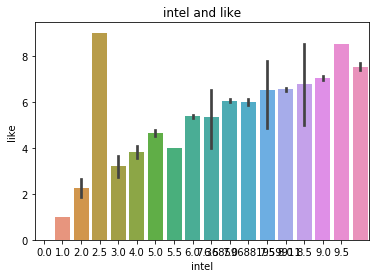

In [123]:
i = 'intel'
j = 'like'

sns.barplot(x = ds[i], y = ds[j])
plt.title(f'{i} and {j}')
plt.xticks(np.arange(0,17))
plt.show()

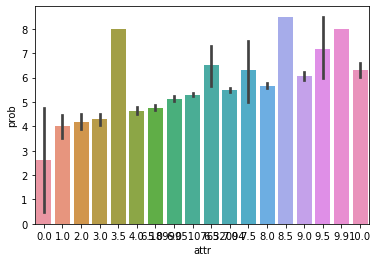

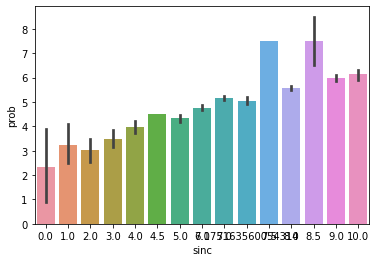

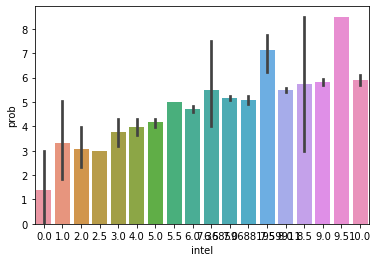

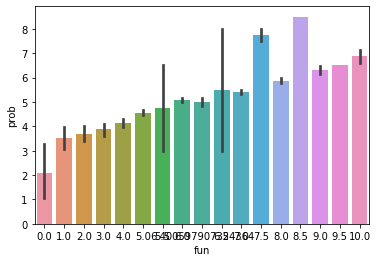

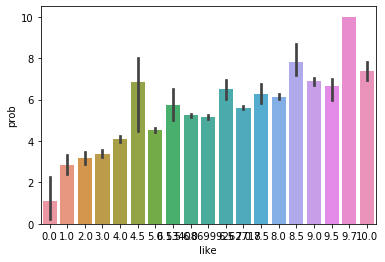

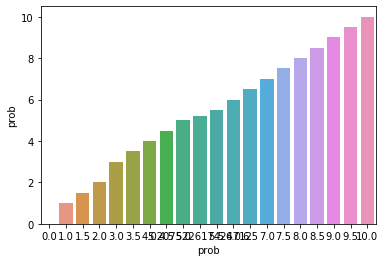

In [77]:
for i in ds.drop(labels = ['dec','match'], axis = 1).columns:
    sns.barplot(x = ds[i], y = ds.prob)
    plt.show()

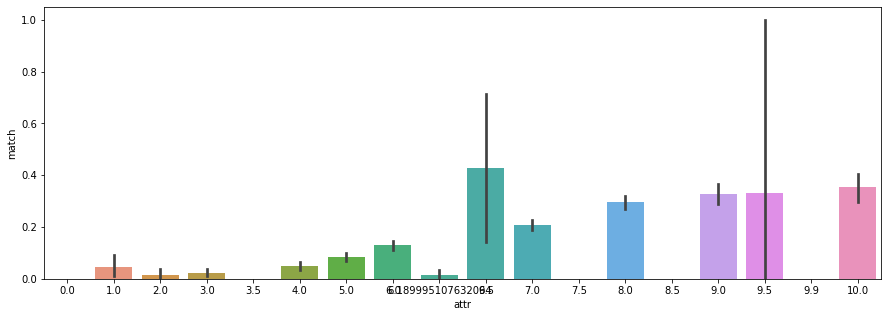

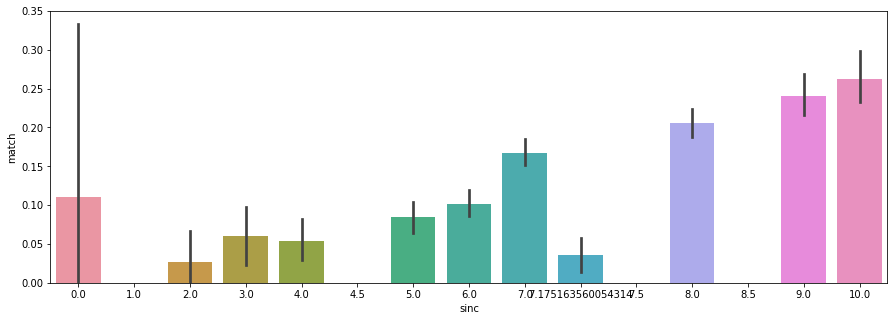

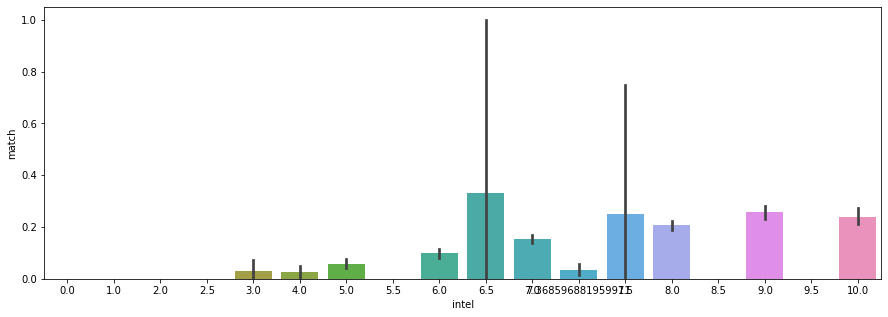

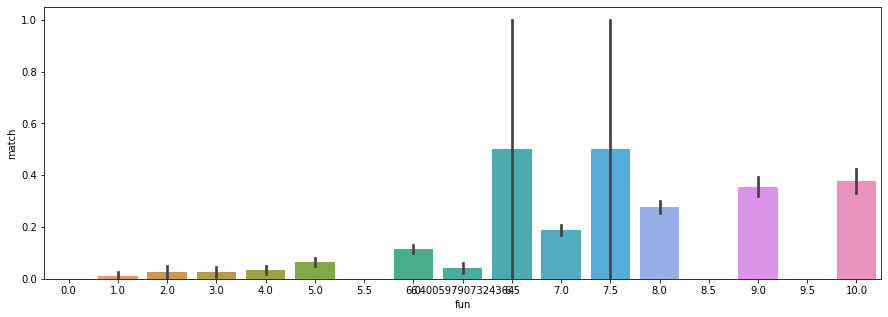

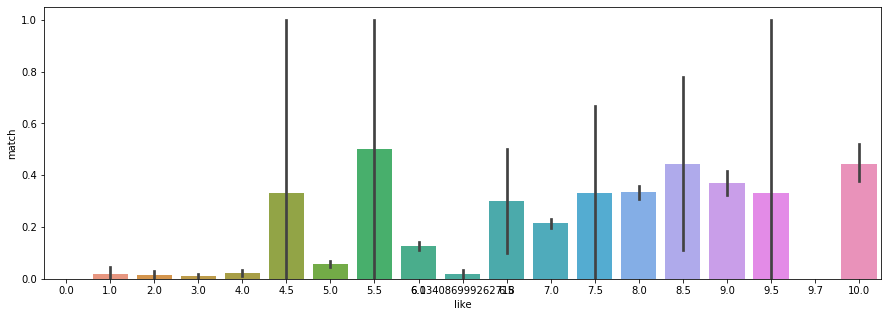

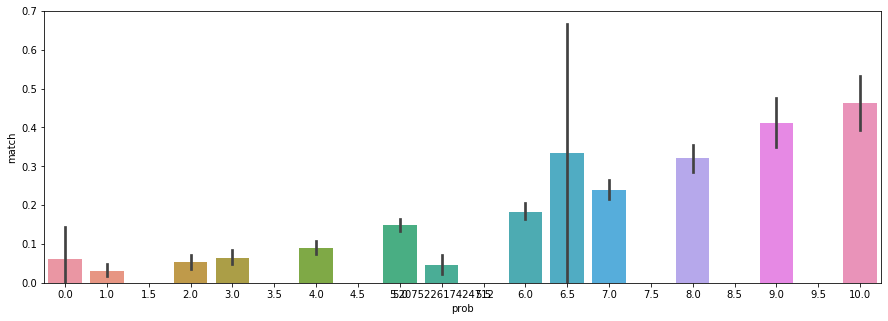

In [79]:
for i in ds.drop(labels = ['dec', 'match'], axis = 1).columns:
    plt.figure(figsize = (15,5))
    sns.barplot(x = ds[i], y = ds.match)
    plt.show()

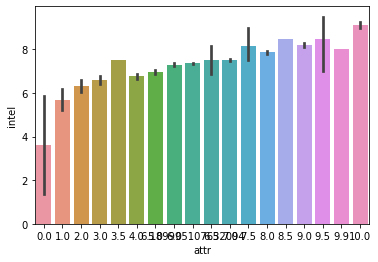

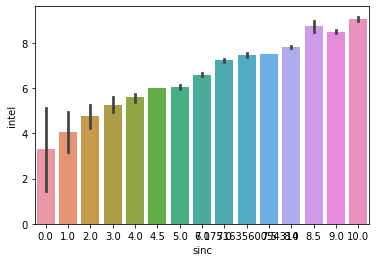

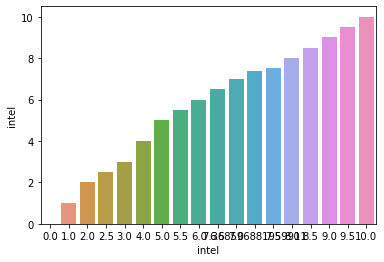

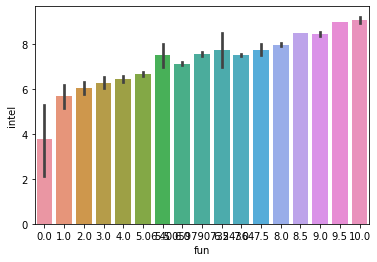

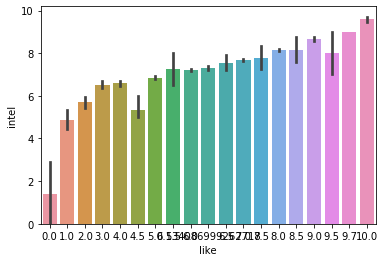

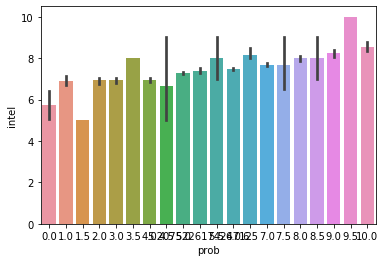

In [76]:
for i in ds.drop(labels = ['dec','match'], axis = 1).columns:
    sns.barplot(x = ds[i], y = ds.intel)
    plt.show()

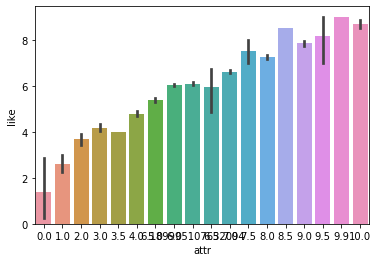

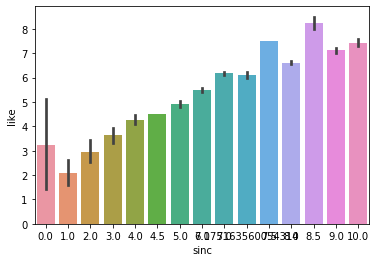

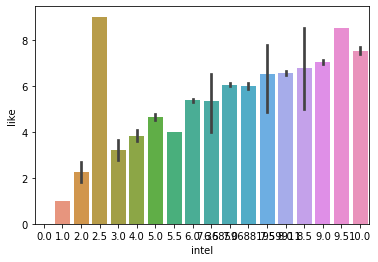

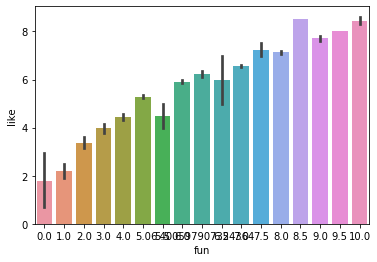

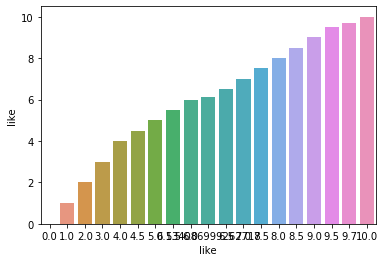

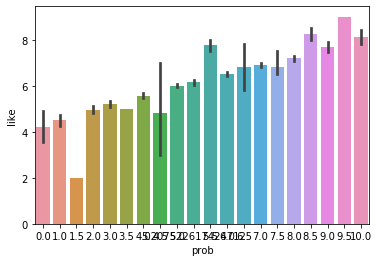

In [75]:
for i in ds.drop(labels = ['dec','match'], axis = 1).columns:
    sns.barplot(x = ds[i], y = ds.like)
    plt.show()

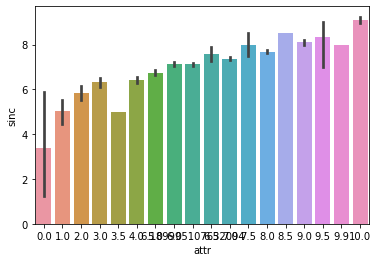

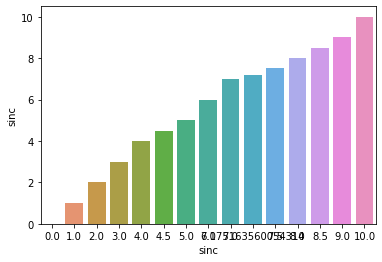

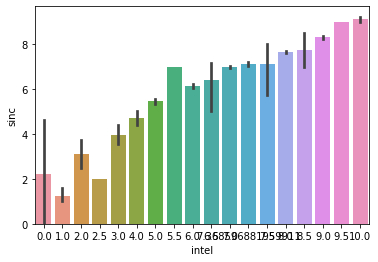

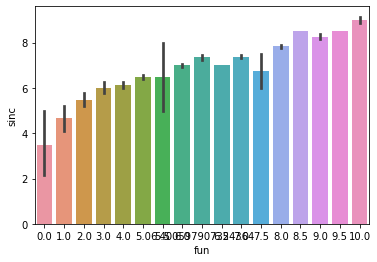

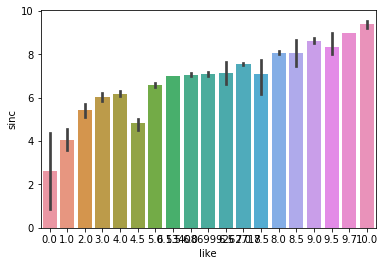

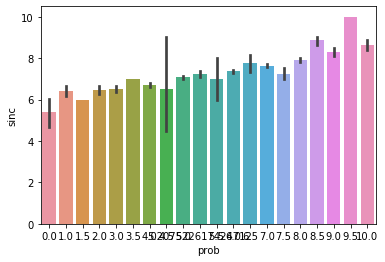

In [74]:
for i in ds.drop(labels = ['dec','match'], axis = 1).columns:
    sns.barplot(x = ds[i], y = ds.sinc)
    plt.show()

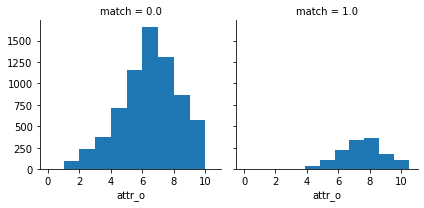

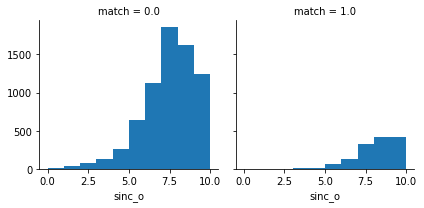

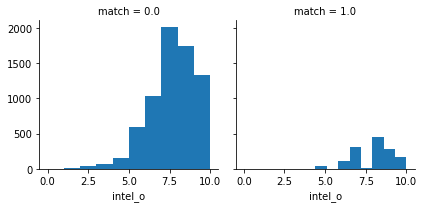

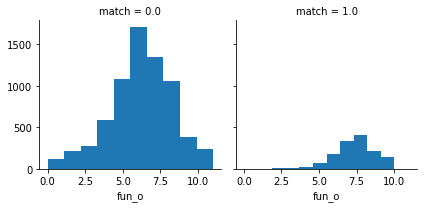

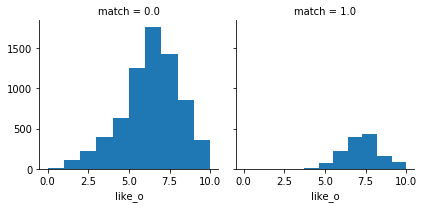

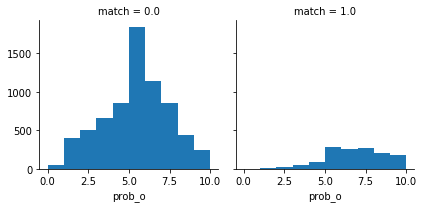

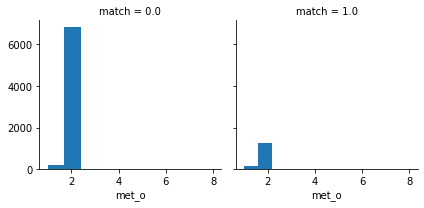

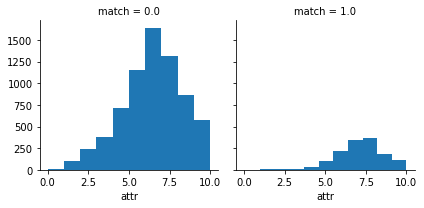

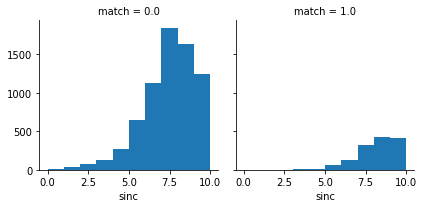

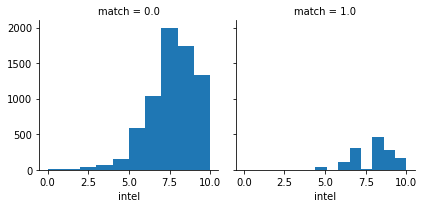

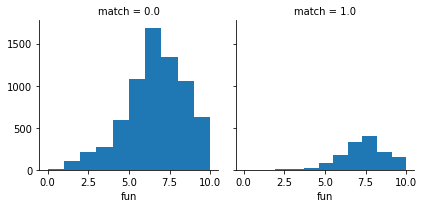

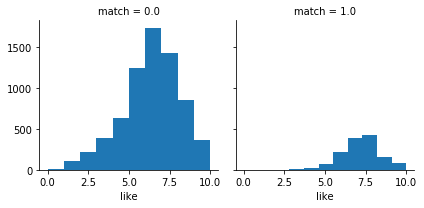

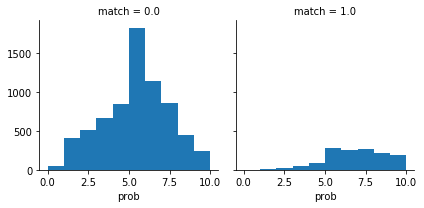

In [25]:
for i in X:
    g = sns.FacetGrid(dataset, col = Y)
    g.map(plt.hist, i)
    plt.show()

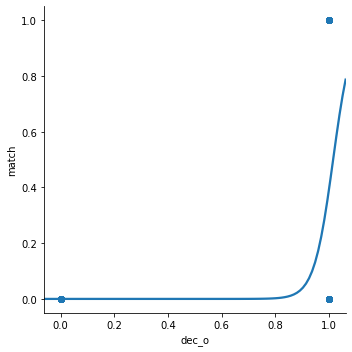

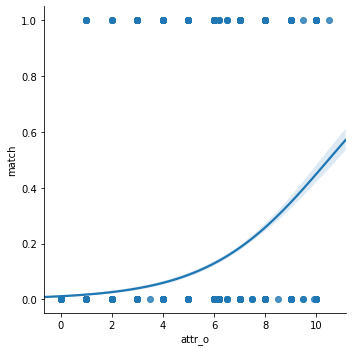

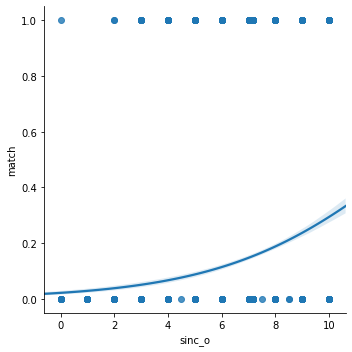

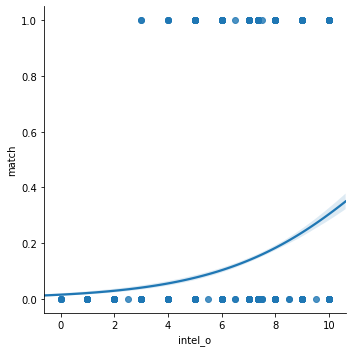

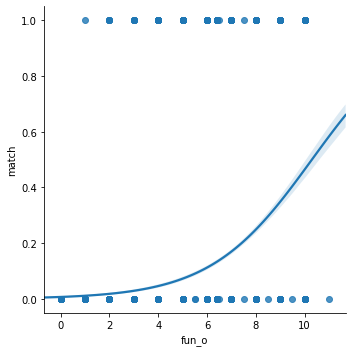

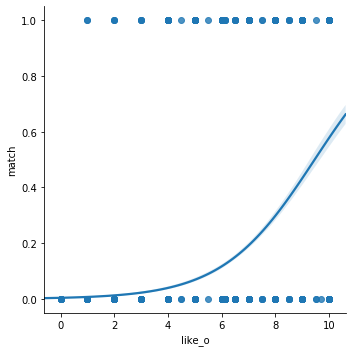

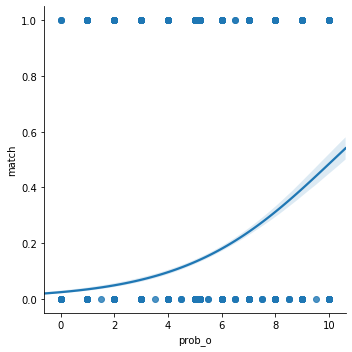

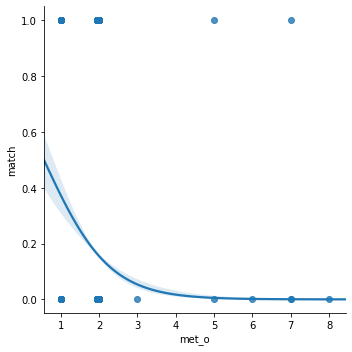

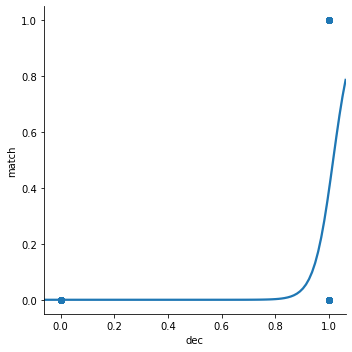

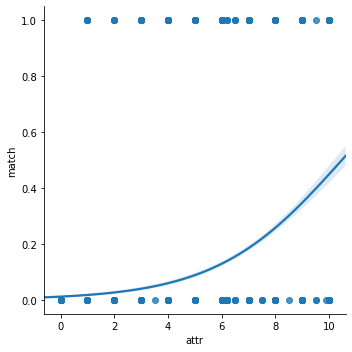

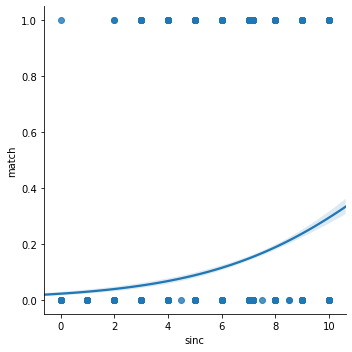

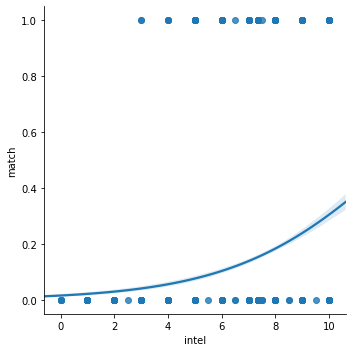

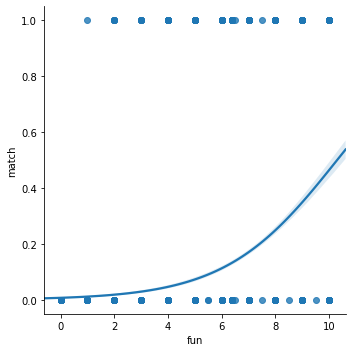

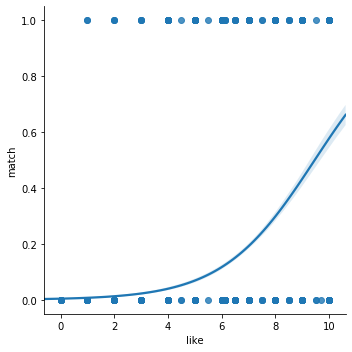

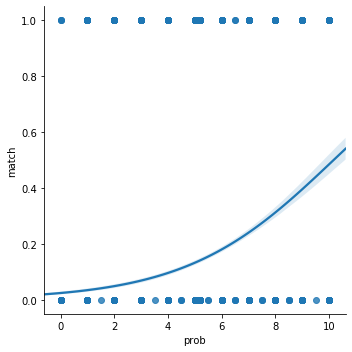

In [77]:
# do linear graphs for each column vs match, with _o grouoped alongside
for i in X:
    sns.lmplot(x = i, y = Y, data = dataset, logistic = True)
    plt.show()

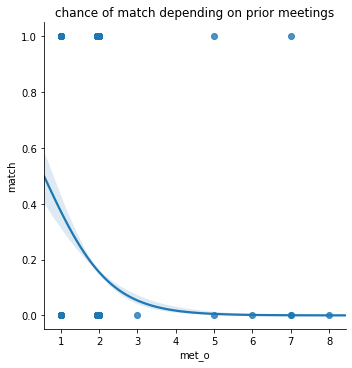

In [26]:
sns.lmplot(x = 'met_o', y = Y, data = dataset, logistic = True)
plt.title('chance of match depending on prior meetings')
plt.show()

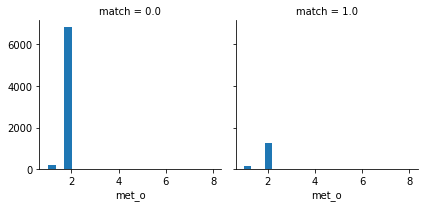

In [27]:
g = sns.FacetGrid(dataset, col = Y)
g.map(plt.hist, 'met_o', bins = 20)
plt.show()

### Even though the linear plot makes it look like diminishing returns on meeting prior to the date, oru sidtribution plot shows that 2 prior meeting is much more likely to predict a match than 1 prior meeting.

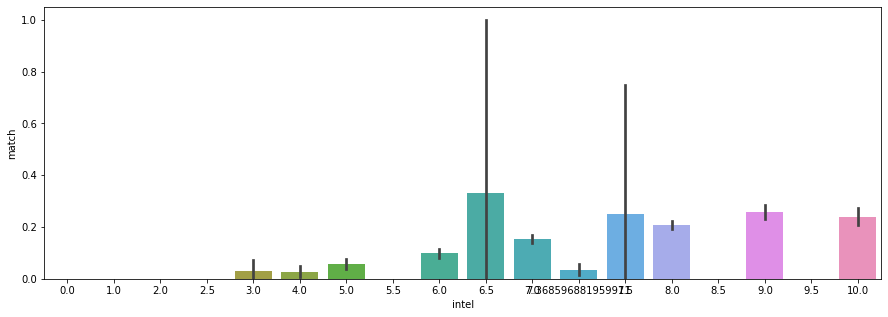

In [35]:
fig, ax = plt.subplots(figsize = (15,5))
sns.barplot(x = 'intel', y = 'match', data = dataset)
plt.show()

In [113]:
# see if _o columns are different in predicting dec_o vs self

In [342]:
data.isnull().any()[lambda x: x]

field     True
career    True
dtype: bool

In [99]:
# lets take our candidates whom considered race to be important, and whom where of the same race, 
# then seeing if that made a match more likely
data = date.dropna().copy()
data.field = data.field.dropna()
samey = []
not_samey = []
nor_prob = data.match.sum()/len(data)
nor_prob = round(nor_prob, 3)
x = range(11)
for j in range(2):
    for i in x:
        racey = data[(data.imprace >= i) & (data.imprace < (i + 1)) & (data.samerace == j)]
        proportional_match = racey.match.sum()/len(racey)
        if j == 0:
            not_samey.append(proportional_match)
        else:
            samey.append(proportional_match)

note: normal match probability (green line): 0.175


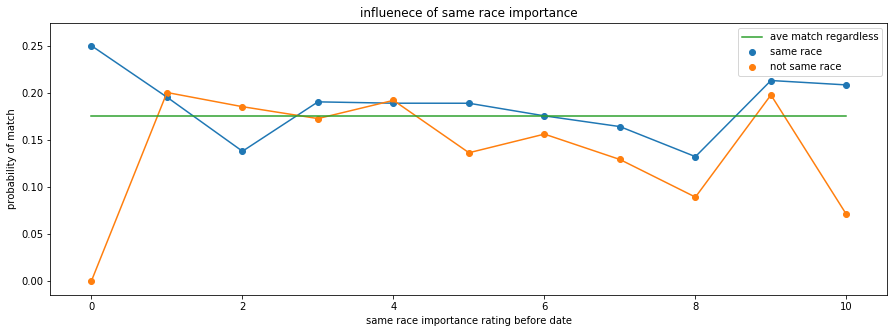

In [100]:
print('note: normal match probability (green line):', nor_prob)
plt.figure(figsize = (15,5))
plt.scatter(x = x, y = samey, label = 'same race')
plt.plot(x, samey)
plt.scatter(x = x, y = not_samey, label = 'not same race')
plt.plot(x, not_samey)
plt.title('influenece of same race importance')
plt.xlabel('same race importance rating before date')
plt.ylabel('probability of match')
plt.plot([0,10], [0.175, 0.175], label = 'ave match regardless')
plt.legend()
plt.show()

In [395]:
# looking through career it was established that there were too many synonyms to make a good dataset i.e. academia, academic, 
# academic_student etc hence why I've opted for the 'field' varible, it needed to be made lower/upper case as Law and law 
# were sepearte

In [40]:
data.field = pd.DataFrame([i.lower() for i in data.field])

In [41]:
fielding = pd.DataFrame(data.groupby(data.field, as_index = False)['match'].sum()) # sum of matches grouped by field
fielder = pd.DataFrame(data.field.value_counts()) # counts per field
fielder = fielder.rename(columns = {'field':'count'})
fielder['field'] = fielder.index
fielder.index = np.array(range(216))
fielder = fielder.sort_values(by = 'field')

In [42]:
ds_field = pd.merge(fielding, fielder, how='inner', on = fielder.field) # merging both datasets
ds_field = ds_field.drop(columns = ['key_0','field_y']) 
ds_field['proportion'] = ds_field.match / ds_field['count'] # making new proportional column

In [43]:
field_test = ds_field[(ds_field['count'] > 50)].sort_values(by = 'proportion', ascending = False) # sorting by higher   
                                                                                     # counts for statistical valididty

In [44]:
field_label = [i for i in field_test.field_x]
print(field_test.field_x.to_list())

['political science', 'finance', 'medicine', 'clinical psychology', 'business', 'mathematics', 'film', 'psychology', 'law', 'biology', 'sociology', 'engineering', 'education', 'electrical engineering', 'mba', 'international affairs', 'chemistry', 'social work', 'business (mba)', 'genetics']


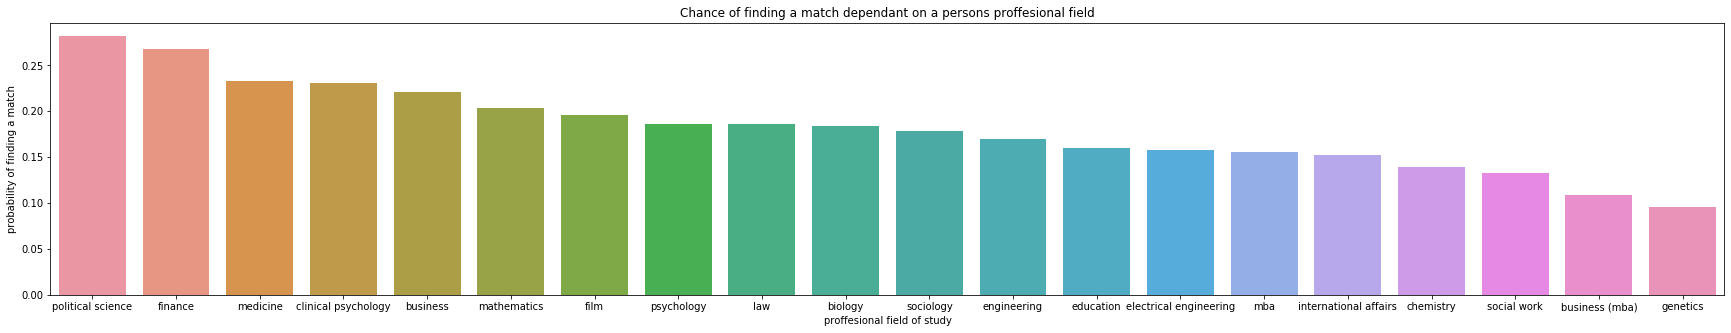

In [110]:
field_label = field_test.field_x.to_list()
plt.figure(figsize = (30,5))
sns.barplot(x = field_test.field_x, y = field_test.proportion, label = field_label)
#plt.plot([-1,20], [0.175,0.175], label = 'average baseline')
plt.xlabel('proffesional field of study')
plt.ylabel('probability of finding a match')
plt.title('Chance of finding a match dependant on a persons proffesional field')
plt.show()


In [46]:
ds_field[:10]

,field_x,match,count,proportion
0,acting,2,14,0.142857
1,african-american studies/history,2,6,0.333333
2,american studies,0,3,0.000000
3,american studies (masters),8,12,0.666667
4,anthropology,3,9,0.333333
5,anthropology/education,4,14,0.285714
6,applied physiology & nutrition,2,16,0.125000
7,architecture,0,9,0.000000
8,art education,9,37,0.243243
9,art history,4,15,0.266667


In [114]:
# go back to normal dataset and see if race or importance_same_race actually predicts if they are with same race

In [115]:
plt.scatter()

In [116]:
#look at field of study and see if similar domains attract or repel or neither

In [117]:
# go into our 3 stringy_cols to see if there is some link

In [118]:
# do a pie chart in how much each column in our new dataset represents importance towards the end result, 
# if dec_o and dec are too high get rid of them as obvious

In [119]:
# does intelligence_importance have an impact on dec if they find the person intelligent/ 
# do peoples presunmptions prior to tthe date affect theire decisions

In [ ]:
# look for the thing that would have the strongest negative impact with a bar plot